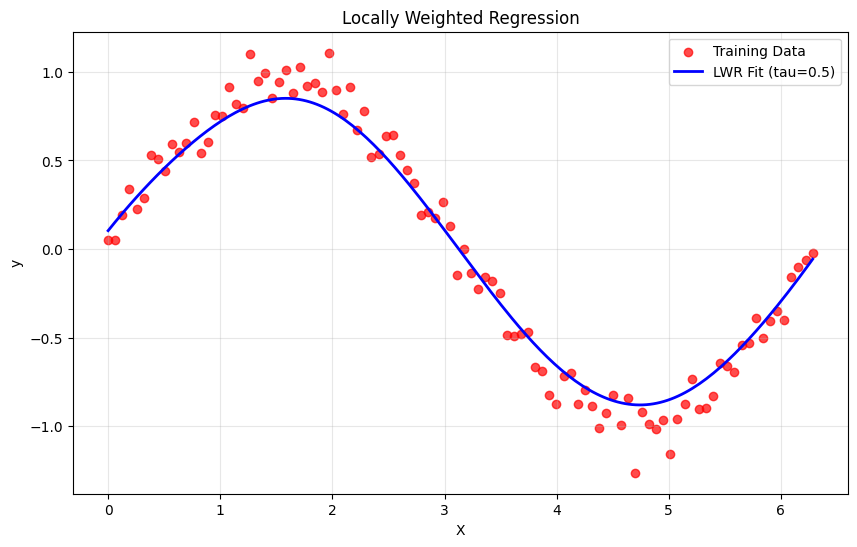

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def locally_weighted_regression(x, X, y, tau):
    w = np.exp(-np.sum((X - x)**2, axis=1) / (2 * tau**2)) #gaussian kernel
    W = np.diag(w)
    theta = np.linalg.pinv(X.T @ W @ X) @ X.T @ W @ y
    return x @ theta

# Data
np.random.seed(42)
X = np.linspace(0, 2 * np.pi, 100)
y = np.sin(X) + 0.1 * np.random.randn(100)
X_bias = np.c_[np.ones(X.shape), X]

# Prediction
x_test = np.linspace(0, 2 * np.pi, 200)
x_test_bias = np.c_[np.ones(x_test.shape), x_test]
tau = 0.5
y_pred = np.array([locally_weighted_regression(xi, X_bias, y, tau) for xi in x_test_bias])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Training Data', alpha=0.7)
plt.plot(x_test, y_pred, color='blue', label=f'LWR Fit (tau={tau})', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Locally Weighted Regression')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

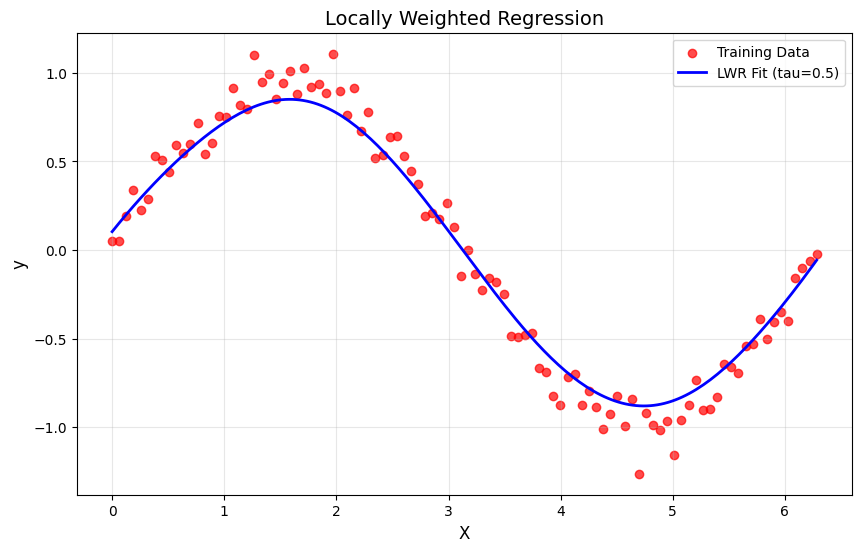

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel(x, xi, tau):
    return np.exp(-np.sum((x - xi) ** 2) / (2 * tau ** 2))

def locally_weighted_regression(x, X, y, tau):
    m = X.shape[0]
    weights = np.array([gaussian_kernel(x, X[i], tau) for i in range(m)])
    W = np.diag(weights)
    X_transpose_W = X.T @ W
    theta = np.linalg.inv(X_transpose_W @ X) @ X_transpose_W @ y
    return x @ theta

np.random.seed(42)
X = np.linspace(0, 2 * np.pi, 100)
y = np.sin(X) + 0.1 * np.random.randn(100)
X_bias = np.c_[np.ones(X.shape), X]
x_test = np.linspace(0, 2 * np.pi, 200)
x_test_bias = np.c_[np.ones(x_test.shape), x_test]
tau = 0.5
y_pred = np.array([locally_weighted_regression(xi, X_bias, y, tau) for xi in x_test_bias])

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Training Data', alpha=0.7)
plt.plot(x_test, y_pred, color='blue', label=f'LWR Fit (tau={tau})', linewidth=2)
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Locally Weighted Regression', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Gaussian kernel function to calculate weights
# x: the test point, xi: a training point, tau: bandwidth parameter
def gaussian_kernel(x, xi, tau):
    return np.exp(-np.sum((x - xi) ** 2) / (2 * tau ** 2))

# Define the Locally Weighted Regression (LWR) function
# x: the test point, X: training data, y: training labels, tau: bandwidth parameter
def locally_weighted_regression(x, X, y, tau):
    m = X.shape[0]  # Number of training points
    # Compute weights for each training point using the Gaussian kernel
    weights = np.array([gaussian_kernel(x, X[i], tau) for i in range(m)])
    W = np.diag(weights)  # Create a diagonal matrix of weights
    # Compute the weighted normal equation for linear regression
    X_transpose_W = X.T @ W
    theta = np.linalg.inv(X_transpose_W @ X) @ X_transpose_W @ y
    return x @ theta  # Return the predicted value for the test point

# Set a random seed for reproducibility
np.random.seed(42)

# Generate 100 evenly spaced points between 0 and 2π for training data
X = np.linspace(0, 2 * np.pi, 100)

# Generate noisy sine wave data as training labels
y = np.sin(X) + 0.1 * np.random.randn(100)

# Add a bias term (column of ones) to the training data for linear regression
X_bias = np.c_[np.ones(X.shape), X]

# Generate 200 evenly spaced points between 0 and 2π for testing
x_test = np.linspace(0, 2 * np.pi, 200)

# Add a bias term (column of ones) to the test data
x_test_bias = np.c_[np.ones(x_test.shape), x_test]

# Set the bandwidth parameter for the Gaussian kernel
tau = 0.5

# Predict the output for each test point using Locally Weighted Regression
y_pred = np.array([locally_weighted_regression(xi, X_bias, y, tau) for xi in x_test_bias])

# Plot the results
plt.figure(figsize=(10, 6))  # Set the figure size
# Scatter plot of the training data
plt.scatter(X, y, color='red', label='Training Data', alpha=0.7)
# Line plot of the predicted values
plt.plot(x_test, y_pred, color='blue', label=f'LWR Fit (tau={tau})', linewidth=2)
# Add labels and title to the plot
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Locally Weighted Regression', fontsize=14)
# Add a legend to the plot
plt.legend(fontsize=10)
# Add a grid to the plot
plt.grid(alpha=0.3)
# Display the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gaussian kernel to calculate weights based on distance
def gaussian_kernel(x, xi, tau):
    return np.exp(-np.sum((x - xi) ** 2) / (2 * tau ** 2))

# Locally Weighted Regression (LWR) for a single test point
def locally_weighted_regression(x, X, y, tau):
    weights = np.array([gaussian_kernel(x, X[i], tau) for i in range(X.shape[0])])
    W = np.diag(weights)  # Diagonal weight matrix
    theta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ y)  # Weighted normal equation
    return x @ theta  # Predicted value

# Generate training data (noisy sine wave)
np.random.seed(42)
X = np.linspace(0, 2 * np.pi, 100)
y = np.sin(X) + 0.1 * np.random.randn(100)
X_bias = np.c_[np.ones(X.shape), X]  # Add bias term

# Generate test data
x_test = np.linspace(0, 2 * np.pi, 200)
x_test_bias = np.c_[np.ones(x_test.shape), x_test]  # Add bias term

# Set bandwidth and predict using LWR
tau = 0.5
y_pred = np.array([locally_weighted_regression(xi, X_bias, y, tau) for xi in x_test_bias])

# Plot training data and LWR fit
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Training Data', alpha=0.7)
plt.plot(x_test, y_pred, color='blue', label=f'LWR Fit (tau={tau})', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Locally Weighted Regression')
plt.legend()
plt.grid(alpha=0.3)
plt.show()